# Introduction to Numpy

We'll be analyzing taxi trip data released by the city of New York.

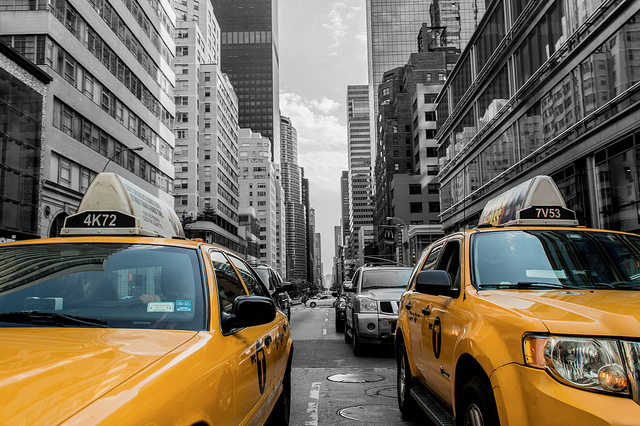

In [3]:
from IPython.display import Image
Image(filename='nyc_taxi.jpg') 

We'll be working with a subset of this data: Yellow taxi trips to and from New York City airports between January and June 2016. In our dataset, each row represents a unique taxi trip. Below is information about selected columns from the data set:

- `pickup_year` - The year of the trip.
- `pickup_month` - The month of the trip (January is 1, December is 12).
- `pickup_day` - The day of the month of the trip.
- `pickup_location_code` - The airport or borough where the the trip started, as one of eight categories:<br>
 * 0 - Bronx.<br>
 * 01 - Brooklyn.<br>
 * 02 - JFK Airport.<br>
 * 03 - LaGuardia Airport.<br>
 * 04 - Manhattan.<br>
 * 05 - Newark Airport.<br>
 * 06 - Queens.<br>
 * 07 - Staten Island.
- `dropoff_location_code` - The airport or borough where the the trip finished, using the same eight category codes as pickup_location_code.
- `trip_distance` - The distance of the trip in miles.
- `trip_length` - The length of the trip in seconds.
- `fare_amount` - The base fare of the trip, in dollars.
- `total_amount` - The total amount charged to the passenger, including all fees, tolls and tips.

In [1]:
import csv
f = open('nyc_taxis.csv')
csvreader = csv.reader(f)
taxi_list = list(csvreader)
header = taxi_list[0]
print(header)

['pickup_year', 'pickup_month', 'pickup_day', 'pickup_dayofweek', 'pickup_time', 'pickup_location_code', 'dropoff_location_code', 'trip_distance', 'trip_length', 'fare_amount', 'fees_amount', 'tolls_amount', 'tip_amount', 'total_amount', 'payment_type']


In [2]:
taxi_list = taxi_list[1:]
print(taxi_list[0:5])

[['2016', '1', '1', '5', '0', '2', '4', '21.00', '2037', '52.00', '0.80', '5.54', '11.65', '69.99', '1'], ['2016', '1', '1', '5', '0', '2', '1', '16.29', '1520', '45.00', '1.30', '0.00', '8.00', '54.30', '1'], ['2016', '1', '1', '5', '0', '2', '6', '12.70', '1462', '36.50', '1.30', '0.00', '0.00', '37.80', '2'], ['2016', '1', '1', '5', '0', '2', '6', '8.70', '1210', '26.00', '1.30', '0.00', '5.46', '32.76', '1'], ['2016', '1', '1', '5', '0', '2', '6', '5.56', '759', '17.50', '1.30', '0.00', '0.00', '18.80', '2']]


In [3]:
# convert all values to floats
converted_taxi_list = []
for row in taxi_list:
    converted_row = []
    for item in row:
        converted_row.append(float(item))
    converted_taxi_list.append(converted_row)
print(converted_taxi_list[0:5])

[[2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 4.0, 21.0, 2037.0, 52.0, 0.8, 5.54, 11.65, 69.99, 1.0], [2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 1.0, 16.29, 1520.0, 45.0, 1.3, 0.0, 8.0, 54.3, 1.0], [2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 6.0, 12.7, 1462.0, 36.5, 1.3, 0.0, 0.0, 37.8, 2.0], [2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 6.0, 8.7, 1210.0, 26.0, 1.3, 0.0, 5.46, 32.76, 1.0], [2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 6.0, 5.56, 759.0, 17.5, 1.3, 0.0, 0.0, 18.8, 2.0]]


In [4]:
# convert the converted_taxi_list variable to a NumPy ndarray
import numpy as np
taxi = np.array(converted_taxi_list)
print(taxi.shape)

(89560, 15)


In [5]:
taxi_three = taxi[:3]
print(taxi_three)

[[2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 4.000e+00
  2.100e+01 2.037e+03 5.200e+01 8.000e-01 5.540e+00 1.165e+01 6.999e+01
  1.000e+00]
 [2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 1.000e+00
  1.629e+01 1.520e+03 4.500e+01 1.300e+00 0.000e+00 8.000e+00 5.430e+01
  1.000e+00]
 [2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 6.000e+00
  1.270e+01 1.462e+03 3.650e+01 1.300e+00 0.000e+00 0.000e+00 3.780e+01
  2.000e+00]]


In [6]:
row_0 = taxi[0]
rows_391_to_500 = taxi[391:501]
row_21_column_5 = taxi[21,5]

In [7]:
columns_1_4_7 = taxi[:,[1,4,7]]
row_99_columns_5_to_8 = taxi[99,5:9]
rows_100_to_200_column_14 = taxi[100:201,14]

In [8]:
trip_distance_miles = taxi[:,7]
trip_length_seconds = taxi[:,8]

trip_length_hours = trip_length_seconds / 3600
trip_mph = trip_distance_miles / trip_length_hours

In [9]:
mph_max = trip_mph.max()
mph_max

82800.0

In [10]:
mph_mean = trip_mph.mean()
mph_mean

32.24258580925573

In [11]:
taxi_column_means = taxi.mean(axis=0)
taxi_column_means

array([2.01600000e+03, 3.61447075e+00, 1.56935351e+01, 3.84133542e+00,
       3.08267084e+00, 2.95988164e+00, 3.37924297e+00, 1.26674261e+01,
       2.23598111e+03, 3.84044840e+01, 1.20917642e+00, 3.53830951e+00,
       5.81448917e+00, 4.89666625e+01, 1.29044216e+00])

In [12]:
trip_mph.shape

(89560,)

In [13]:
trip_mph_2d = np.expand_dims(trip_mph,axis=1)
trip_mph_2d.shape

(89560, 1)

In [14]:
taxi.shape

(89560, 15)

In [15]:
taxi = np.concatenate([taxi,trip_mph_2d],axis=1)
taxi.shape

(89560, 16)

In [19]:
print(taxi[1,:])

[2.01600000e+03 1.00000000e+00 1.00000000e+00 5.00000000e+00
 0.00000000e+00 2.00000000e+00 1.00000000e+00 1.62900000e+01
 1.52000000e+03 4.50000000e+01 1.30000000e+00 0.00000000e+00
 8.00000000e+00 5.43000000e+01 1.00000000e+00 3.85815789e+01]


In [21]:
sorted_order = np.argsort(taxi[:,15])
taxi_sorted = taxi[sorted_order]
print(taxi_sorted[:,15])

[    0.     0.     0. ... 32040. 70560. 82800.]
